In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

<ol><li>Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.</li>
<li>Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.</li>
<li>Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.</li>
<li>Проанализируйте CTR с разбивкой по рекламной кампании.</li>
<li>Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.</li>
<li>Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.</li>
<li>Посчитайте конверсию из клика в покупку.</li></ol>

<h4>Описание данных</h4>
<li><b>ad_id</b> - идентификатор объявления (рекламы)</li>
<li><b>xyz_campaign_id</b> – идентификатор рекламной кампании в базе компании X</li>
<li><b>fb_campaign_id</b> – идентификатор кампании в Facebook</li>
<li><b>age – возрастная</b> группа, которой показывалась реклама</li>
<li><b>gender</b> – пол тех, кому показывалась реклама</li>
<li><b>interest</b> –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)</li>
<li><b>impressions</b> – число показов</li>
<li><b>clicks</b> – число кликов</li>
<li><b>spent –</b> сумма, которую компания потратила на показ объявления </li>
<li><b>total_conversion</b> – количество людей, которые заинтересовались продуктом после просмотра рекламы</li>
<li><b>approved_conversion</b> – количество людей, которые купили продукт после просмотра рекламы</li>

<i><font color="teal">Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.</font></i>

In [41]:
ad_data = pd.read_csv('conversion.csv')

In [42]:
ad_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [43]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [44]:
ad_data.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

<i><font color="teal">Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.</font></i>

In [45]:
ad_data_by_fb_camp_id = ad_data.groupby('fb_campaign_id', as_index=False) \
                               .agg({'Impressions': 'sum'}) \
                               .rename(columns={'Impressions': 'imp_count'})

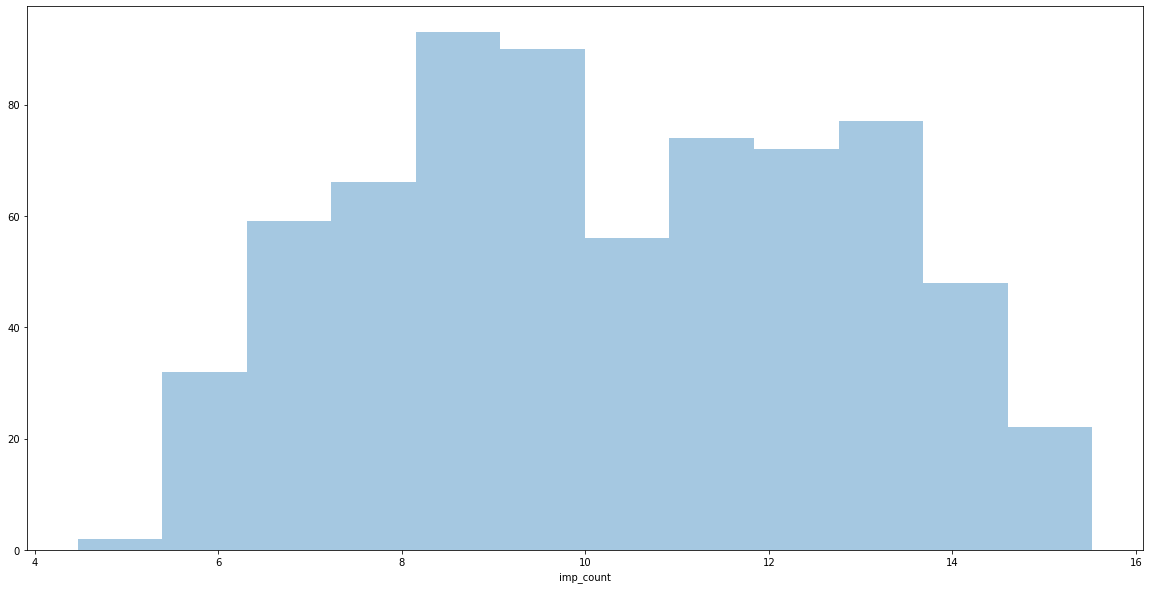

In [46]:
plt.figure(figsize=(20,10))
ax = sns.distplot(np.log(ad_data_by_fb_camp_id.imp_count), kde=False)

<i><font color="teal">Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов. Создайте новую колонку, затем посмотрите на описательные статистики.</font></i>

In [47]:
ad_data['ctr'] = ad_data.Clicks / ad_data.Impressions

In [48]:
ad_data.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [49]:
ad_data.sort_values('ctr', ascending=False).head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531


<i><font color="teal">Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).</font></i>

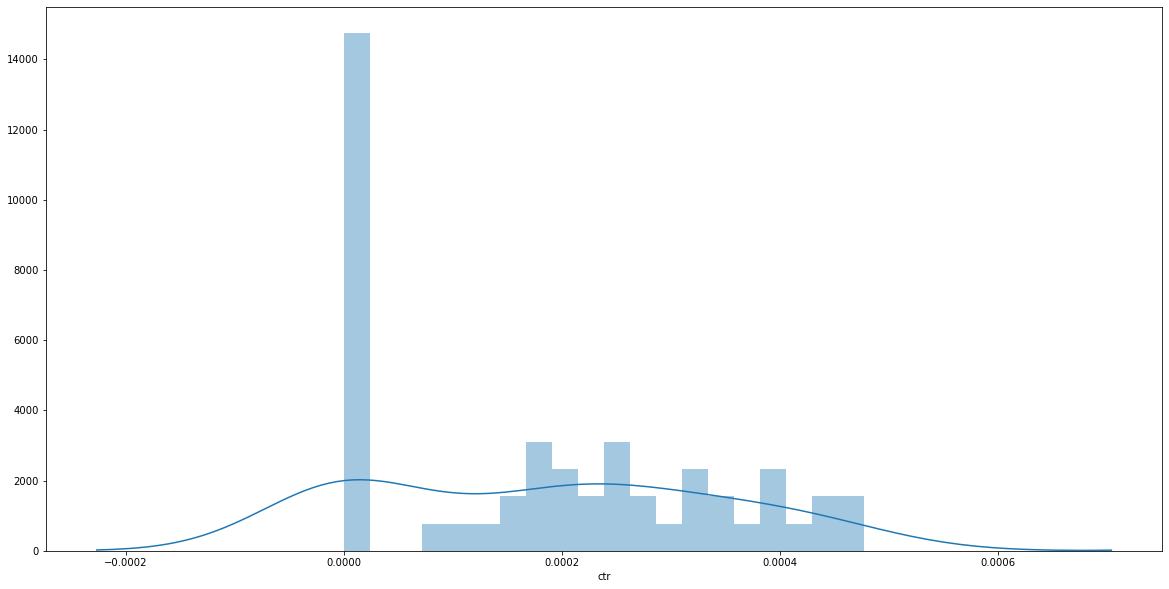

In [50]:
plt.figure(figsize=(20,10))
sns.distplot(ad_data.query('xyz_campaign_id == 916').ctr, bins=20)

<i><font color="teal">CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов.
Выведите описательные статистики для новой переменной, посмотрите на форму распределения.</font></i>

In [51]:
ad_data_cpc = ad_data.groupby('ad_id').agg({'Spent': 'sum'}).Spent / ad_data.groupby('ad_id').agg({'Clicks': 'sum'}).Clicks

In [52]:
ss.iqr(ad_data_cpc, nan_policy='omit')

0.25436369905

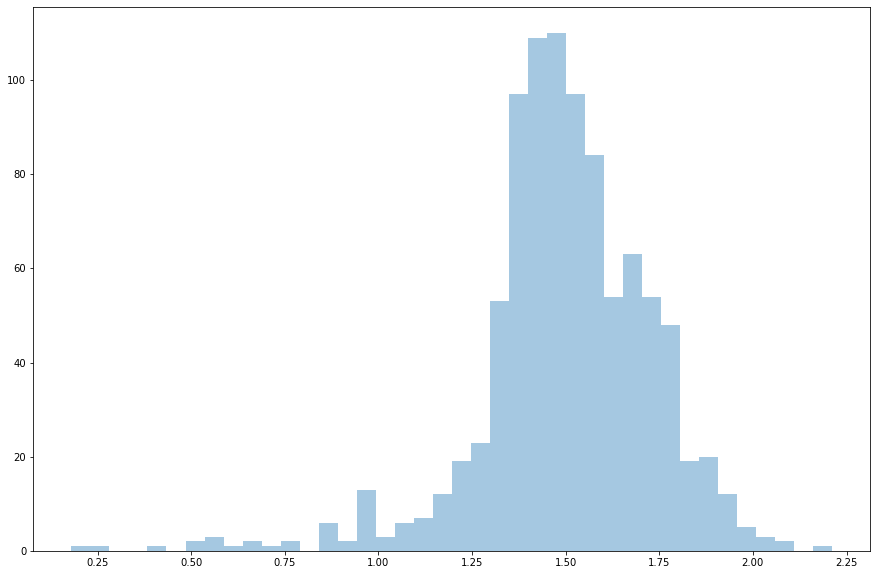

In [53]:
plt.figure(figsize=(15,10))
sns.distplot(ad_data_cpc.dropna(), kde=False)

In [54]:
ad_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


<i><font color="teal">Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. </font></i>

In [56]:
ad_data_cpc_gender = ad_data.groupby(['ad_id', 'gender'], as_index=False).agg({'Spent': 'sum'})

In [57]:
ad_data_cpc_gender['cpc'] = ad_data_cpc_gender.Spent / ad_data.groupby(['ad_id', 'gender'], as_index=False).agg({'Clicks': 'sum'}).Clicks

In [58]:
ad_data_cpc_gender.head()

,ad_id,gender,Spent,cpc
0,708746,M,1.43,1.43
1,708749,M,1.82,0.91
2,708771,M,0.00,NaN
3,708815,M,1.25,1.25
4,708818,M,1.29,1.29


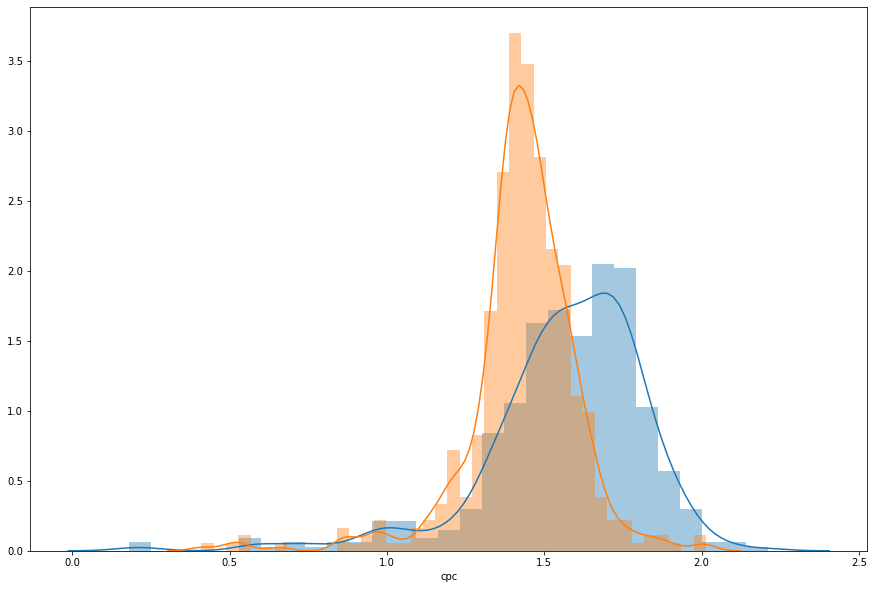

In [61]:
plt.figure(figsize=(15,10))
sns.distplot(ad_data_cpc_gender.dropna().query('gender == "M"').cpc)
sns.distplot(ad_data_cpc_gender.dropna().query('gender == "F"').cpc)

<i><font color="teal">Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.
Посчитайте конверсию из клика в покупку.</font></i>

In [70]:
ad_data_cr = ad_data.groupby('ad_id', as_index=False).agg({'Approved_Conversion': 'sum'})

In [71]:
ad_data_cr['cr'] = ad_data_cr.Approved_Conversion / ad_data.groupby('ad_id', as_index=False).agg({'Clicks': 'sum'}).Clicks

In [73]:
ad_data_cr['clicks'] = ad_data.groupby('ad_id', as_index=False).agg({'Clicks': 'sum'}).Clicks

In [74]:
ad_data_cr.query('ad_id == 1121814')

,ad_id,Approved_Conversion,cr,clicks
860,1121814,13,0.030879,421
